In [122]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [123]:
def softmax(x):
    normalized = x-np.max(x, axis=1, keepdims=True)
    return np.exp(normalized)/np.sum(np.exp(normalized), axis=1, keepdims=True)

def make_oneshot(y, n_classes):
    n_samples = y.shape[0]
    y1 = np.zeros((n_samples, n_classes))
    y1[(np.arange(n_samples), y)] = 1
    return y1

def calculate_loss(y, y1):
    n_samples = y.shape[0]
    return -(1/n_samples)*np.sum(y*np.log(y1))

def gradient_descent(X, y, w, b, epochs, learning_rate):
    losses = []
    for _ in range(epochs):
        z = np.dot(X, w) + b
        y1 = softmax(z)
        loss = calculate_loss(y, y1)
        losses.append(loss)
        n_samples = y.shape[0]
        dw = (1/n_samples)*np.dot(X.T, y1-y)
        db = (1/n_samples)*np.sum(y1-y, axis=0)
        w -= learning_rate*dw
        b -= learning_rate*db
    return w, b, losses

def find_accuracy(y, y1):
    y_ans = np.argmax(y, axis=1)
    y1_ans = np.argmax(y1, axis=1)
    return np.sum(y_ans==y1_ans)/y.shape[0]*100
    
def predict(X, w, b):
    z = np.dot(X, w)+b
    return softmax(z)

In [129]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_samples = X_train.shape[0]
n_features = X_train.shape[1]
n_classes = 10
y_train_oneshot = make_oneshot(y_train, n_classes)
y_test_oneshot = make_oneshot(y_test, n_classes)
w = np.zeros((n_features, n_classes)) 
b = np.zeros(n_classes)
epochs = 500
learning_rate = 0.1
w, b, losses = gradient_descent(X_train, y_train_oneshot, w, b, epochs, learning_rate)
y_train_pred = predict(X_train, w, b)
y_test_pred = predict(X_test, w, b)
train_accuracy = find_accuracy(y_train_oneshot, y_train_pred)
test_accuracy = find_accuracy(y_test_oneshot, y_test_pred)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 89.49821428571428
Test accuracy: 89.52142857142857


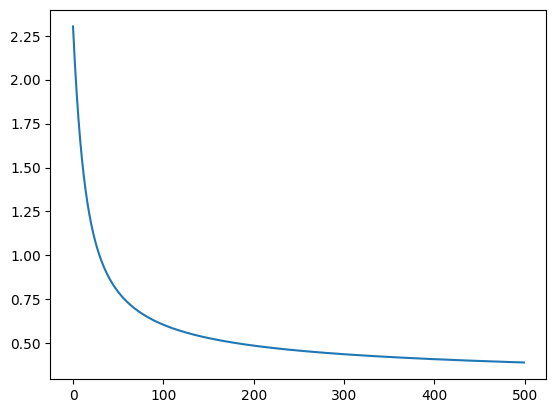

In [137]:
plt.plot(losses)